In [5]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K
from keras import layers as L
from keras.models import Model,load_model
from keras.regularizers import l2
from keras.callbacks import ModelCheckpoint,ReduceLROnPlateau,EarlyStopping
from tensorflow.keras.preprocessing import image
from PIL import Image
import matplotlib.pyplot as plt
from google.colab import drive
import glob
import shutil
import random
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [6]:
drive.mount('/content/drive/')


Mounted at /content/drive/


In [7]:
source_dir_path = "/content/drive/MyDrive/BrailleDataset"
if not os.path.exists(source_dir_path):
  os.makedirs(source_dir_path)

In [ ]:
if os.listdir(source_dir_path).count != 26:
    for char in range(ord('A'), ord('Z') + 1):
        os.makedirs(os.path.join(source_dir_path,chr(char)))

FileExistsError: [Errno 17] File exists: '/content/drive/MyDrive/BrailleDataset/A'

In [ ]:
import zipfile
with zipfile.ZipFile("/content/drive/MyDrive/Braille Dataset zip file.zip", 'r') as zip_ref:
    zip_ref.extractall("/content/drive/MyDrive/surya-ubuntu")

KeyboardInterrupt: 

In [ ]:
dir_path = "/content/drive/MyDrive/surya-ubuntu/Braille Dataset"
for file in os.listdir(dir_path):
   shutil.copy(f"{dir_path}/{file}",f"{source_dir_path}/{file[0].upper()}")

In [ ]:
def add_noise(img):
    '''Add random noise to an image'''
    VARIABILITY = 50
    deviation = VARIABILITY*random.random()
    noise = np.random.normal(0, deviation, img.shape)
    img += noise
    np.clip(img, 0., 255.)
    return img

datagen = ImageDataGenerator(
    rotation_range=30,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
    shear_range=0.2,  # randomly apply shearing transformations (fraction of total width)
    zoom_range=0.2,  # randomly zooms in on images
    horizontal_flip=True,  # randomly flip images horizontally
    brightness_range=[0.2,1.0],  # adjust brightness (range 0.0 to 2.0 where 1.0 is no change)
    preprocessing_function=add_noise,  # adjust contrast
    fill_mode='nearest'  # strategy used for filling in newly created pixels
)
for dir in os.listdir(source_dir_path):
  img = load_img(os.path.join(source_dir_path,dir,os.listdir(f"{source_dir_path}/{dir}")[0]))
  x = img_to_array(img)
  x = np.expand_dims(x, axis=0)
  i = 0
  for batch in datagen.flow(x, batch_size=1,
                          save_to_dir=os.path.join(source_dir_path,dir), save_prefix=f"{dir}", save_format='jpg'):
    i += 1
    if i > 100:
        break

In [8]:
datagen = ImageDataGenerator(rescale=1/255,
                             validation_split=0.2)

train_generator = datagen.flow_from_directory(source_dir_path,
                                              target_size=(224,224),
                                              subset='training')

val_generator = datagen.flow_from_directory(source_dir_path,
                                            target_size=(224,224),
                                            subset='validation')

Found 5230 images belonging to 26 classes.
Found 1293 images belonging to 26 classes.


In [14]:
from tensorflow.keras.applications import VGG16
model_vgg16=VGG16(weights='imagenet')

553467096/553467096 [==============================] - 30s 0us/step


In [15]:
from tensorflow.keras import models, layers
input_layer=layers.Input(shape=(224,224,3))

model_vgg16=VGG16(weights='imagenet',input_tensor=input_layer,include_top=False)

model_vgg16.summary()

58889256/58889256 [==============================] - 4s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

In [ ]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
model = models.Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(100,activation='relu'))
model.add(layers.Dense(100,activation='relu'))
model.add(layers.Dense(100,activation='relu'))
model.add(layers.Dense(26,activation='softmax'))
for layer in base_model.layers:
    layer.trainable = False
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

checkpoint = ModelCheckpoint('BrailleNet.h5',
                             monitor='val_loss',
                             save_best_only=True)
history = model.fit(train_generator,
                              validation_data=val_generator,
                              epochs=15,
                              callbacks=[checkpoint]
                              )
model.save("Braillenetoriginal.keras")

Epoch 1/15
164/164 [==============================] - ETA: 0s - loss: 3.1944 - accuracy: 0.0625 

# New Section
Resuming Training

In [12]:
from tensorflow.keras.models import load_model
model = load_model('/content/drive/MyDrive/braillenet2.keras')
history = model.fit(train_generator,
                              validation_data=val_generator,
                              epochs=5,
                              )

Epoch 1/5


InvalidArgumentError: Graph execution error:

Detected at node categorical_crossentropy/softmax_cross_entropy_with_logits defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.py", line 619, in start

  File "/usr/local/lib/python3.10/dist-packages/tornado/platform/asyncio.py", line 195, in start

  File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 685, in <lambda>

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 738, in _run_callback

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 825, in inner

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 786, in run

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 361, in process_one

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 261, in dispatch_shell

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 539, in execute_request

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py", line 302, in do_execute

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/zmqshell.py", line 539, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "<ipython-input-12-f9c74661fd91>", line 3, in <cell line: 3>

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1807, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1151, in train_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1209, in compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/compile_utils.py", line 277, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 143, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 270, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 2221, in categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend.py", line 5579, in categorical_crossentropy

logits and labels must be broadcastable: logits_size=[32,25] labels_size=[32,26]
	 [[{{node categorical_crossentropy/softmax_cross_entropy_with_logits}}]] [Op:__inference_train_function_1727]

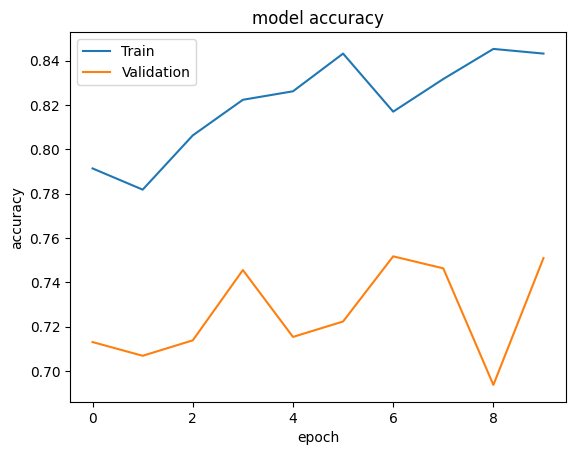

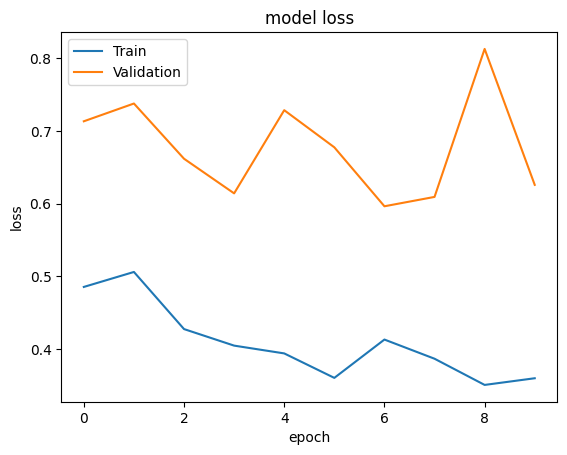

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
from tensorflow.keras.preprocessing import image
from PIL import Image
import numpy as np

img = image.load_img('/content/drive/MyDrive/BrailleDataset/S/S_0_1020.jpg',target_size=(224,224,3))
x = image.img_to_array(img)  # Convert image to numpy array
x = np.expand_dims(x, axis=0)
x = x / 255 # Add batch dimension
print(x.shape)

(1, 224, 224, 3)


In [ ]:
u = np.argmax(model.predict(x),axis=1)
u

1/1 [==============================] - 0s 18ms/step


array([18])